In [1]:
# @title Import packages
import numpy as np
import matplotlib.pyplot as plt
# import all functions defined in ddm.py
from ddm import *

# set the font size of plots
font = {'size'   : 14}
plt.rc('font', **font)

- Basic setup to simulate trajectories with 3 parameters (drift, bound, starting point) using Euler Mayurama  method
	- Obtain histograms and psychometrics
	- Compare to analytic solutions, explore the error of the approximation with dt
	- Explore dependence of histograms and psychometrics with parameter values
- Add time varying bound, variability in parameters
- Explore race models

- "Optogenetic manipulations"
	- "Sensory neurons" vs "Integrator neurons"
	- Bound "deletion"
        - Other ways?

- History effects
	- Explore updates on starting point and drifts
	- Also post error slowing (increase bounds after errors)

### Perform simulations

In [2]:
# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std
b = 0.1 # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

In [3]:
# Run DDM simulations for different drifts
n_mu = 21
mu_list = 2*np.linspace(-1, 1, n_mu)
z_list = 0*np.concatenate((-np.ones((10,)),\
                              np.zeros((1,)),\
                              np.ones((10,))))
b = 0.01
# Preallocate results
S_list = []
hits_list = []
errs_list = []
for i, mu in enumerate(mu_list):
    z = z_list[i]
    # Simulate trajectories
    S, hits, errs, thetas = sim_ddm(mu, theta, b, z, sigma, n_trials, dt, T)
    S_list.append(S)
    hits_list.append(hits)
    errs_list.append(errs)

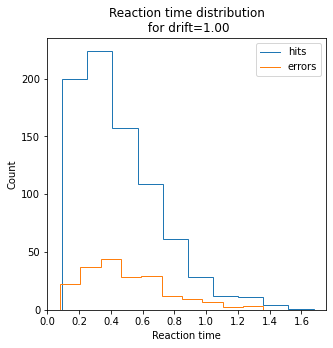

In [4]:
# Plot the reaction time distributions for the hit and error trials, for example mu
mu_i = 15 # example mu

hits = S_list[mu_i][hits_list[mu_i],1]
errs = S_list[mu_i][errs_list[mu_i],1]

plot_rt_hist(hits, errs)
plt.title('Reaction time distribution\n for drift={:.2f}'.format(mu_list[mu_i]))
plt.show()

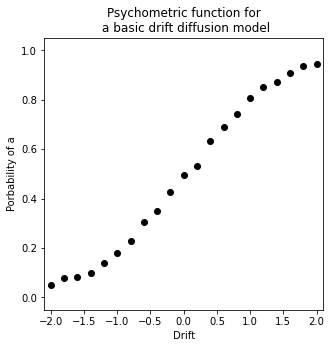

In [5]:
# Plot a psychometric curve
prob_a = plot_psychometric(S_list, mu_list)
plt.title('Psychometric function for\n a basic drift diffusion model')
plt.show()

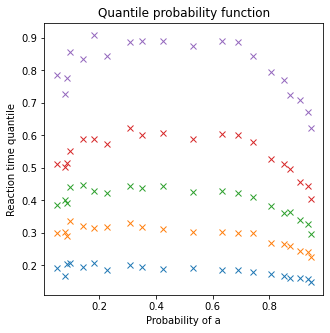

In [6]:
# Plot the quantile probability function
plot_quantile_prob_func(S_list, hits_list, errs_list, mu_list, prob_a)
plt.title('Quantile probability function')
plt.show()